In [41]:
#use:
#plot output for sample
#
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import VisualLib as VSLib

In [47]:
ncfile='../sample/sample.ecosim.h0.1800-01-01-00000.nc'
#ncfile='/Users/jinyuntang/work/github/ecsim2/EcoSIM/examples/run_dir/sample/sample.ecosim.h0.1800-01-01-00000.nc'
year0=VSLib.get_hist_yr(ncfile)
# Open the NetCDF file
nc_file = nc.Dataset(ncfile, 'r')
print('year0=%d'%year0)
print("\nVariables:")
for var_name in nc_file.variables:
    print(var_name)

year0=1800

Variables:
ACTV_LYR
AIR_TEMP
AMENDED_C
AMENDED_N
AMENDED_P
ATM_CH4
ATM_CO2
AUTO_RESP
BLYR_RSC_CO2
BLYR_RSC_H2O
BRANCH_NO
CAN_CO2
CAN_CO2_FLX
CAN_G
CAN_GPP
CAN_H
CAN_HT
CAN_LE
CAN_RA
CAN_RN
CAN_TEMPC
CAN_TEMPK
CH4_FLX
CH4_vr
CO2_FLX
CO2_LITR
CO2_vr
C_PARTS_brch_01
C_PARTS_brch_02
C_PARTS_brch_03
C_PARTS_brch_04
C_PARTS_brch_05
C_PARTS_brch_06
C_PARTS_brch_07
C_PARTS_brch_08
C_PARTS_brch_09
C_PARTS_brch_10
Canopy_PAR
DISCHG_FLX
DNS_RT_vr
ECND_vr
ECO_G
ECO_GPP
ECO_H
ECO_HVST_C
ECO_HVST_N
ECO_HVST_P
ECO_LAI
ECO_LE
ECO_NEE_CO2
ECO_NPP
ECO_RA
ECO_RH
ECO_Radnet
ET
EVAPN
EXUD_C_FLX
EXUD_N_FLX
EXUD_P_FLX
FIREp_CH4_FLX
FIREp_CO2_FLX
FIREp_N_FLX
FIREp_P_FLX
GRAIN_C
GRAIN_N
GRAIN_NO
GRAIN_P
Growth_Stage
HMAX_AIR
HMIN_AIR
HUM
HUMUS_C
HUMUS_N
HUMUS_P
HUSK_C
HUSK_N
HUSK_P
HVST_C_FLX
HVST_N_FLX
HVST_P_FLX
HeatFlx2G_col
LAI_xstk
LAIstk
LEAF_C
LEAF_N
LEAF_NC
LEAF_NODE_NO
LEAF_P
LEAF_PC
LITRf_C
LITRf_N_FLX
LITRf_P_FLX
MIN_LWP
N2O_LITR
N2O_vr
N2_FIXN_FLX
NBP
NET_N_MIN
NET_P_MIN
NH3_LITR
NH3_vr

In [48]:
#get number of branches of the plants

numbranch_pft=nc_file.variables['BRANCH_NO'][:]
maxbrach_pft=np.max(numbranch_pft,axis=0)
numlivepft=np.sum(maxbrach_pft>0)
LAI=nc_file.variables['LAI_xstk'][:]
cGPP=nc_file.variables['ECO_GPP'][:]
eco_lai=nc_file.variables['ECO_LAI'][:]
rubactn=nc_file.variables['RUB_ACTVN'][:]
                          
tGPP=VSLib.cumts2ts(cGPP,year0)

CanGPP=nc_file.variables['CAN_GPP'][:]
print('#of live pft:')
print(numlivepft)
print('#of live branch: %d')                          
print(maxbrach_pft)                        
print(rubactn.shape)

nyears=10
year=1800
year=1801
year=1802
year=1803
year=1804
year=1805
year=1806
year=1807
year=1808
year=1809
#of live pft:
2
#of live branch: %d
[1.0 5.0 -- -- --]
(3652, 10, 5)


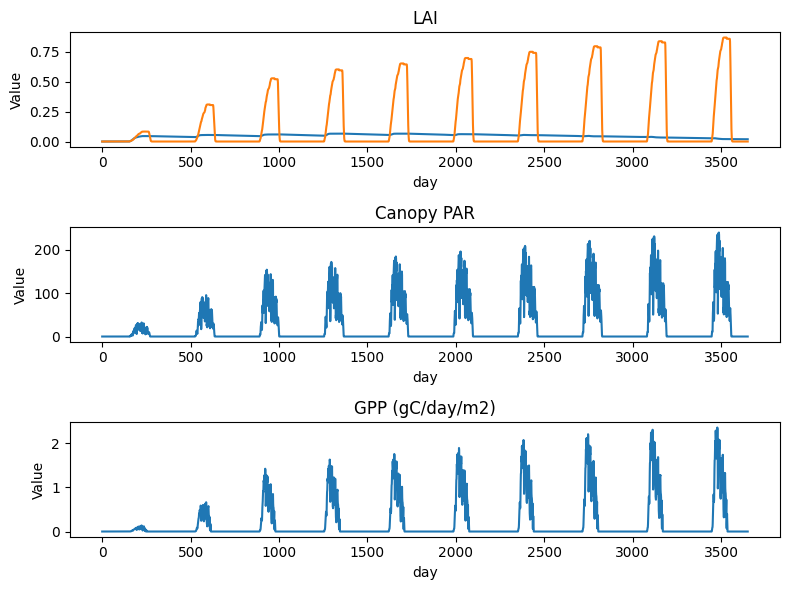

In [49]:
numbranch_pft=nc_file.variables['BRANCH_NO'][:]
maxbrach_pft=np.max(numbranch_pft,axis=0)
numlivepft=np.sum(maxbrach_pft>0)
LAI=nc_file.variables['LAI_xstk'][:]
parcan=nc_file.variables['Canopy_PAR'][:]
CanGPP=nc_file.variables['CAN_GPP'][:]

fig, axs = plt.subplots(3, 1, figsize=(8, 6))

axs[0].plot(LAI[:,0:2])
axs[0].set_xlabel('day')
axs[0].set_ylabel('Value')
axs[0].set_title('LAI')


axs[1].plot(parcan[:,1])
axs[1].set_xlabel('day')
axs[1].set_ylabel('Value')
axs[1].set_title('Canopy PAR')

cCanGPP=CanGPP[:,1].reshape(-1, 1)

axs[2].plot(cCanGPP*24.)
axs[2].set_xlabel('day')
axs[2].set_ylabel('Value')
axs[2].set_title('GPP (gC/day/m2)')

# Adjust layout
plt.tight_layout()

plt.show()

Text(0.5, 1.0, 'Grain C')

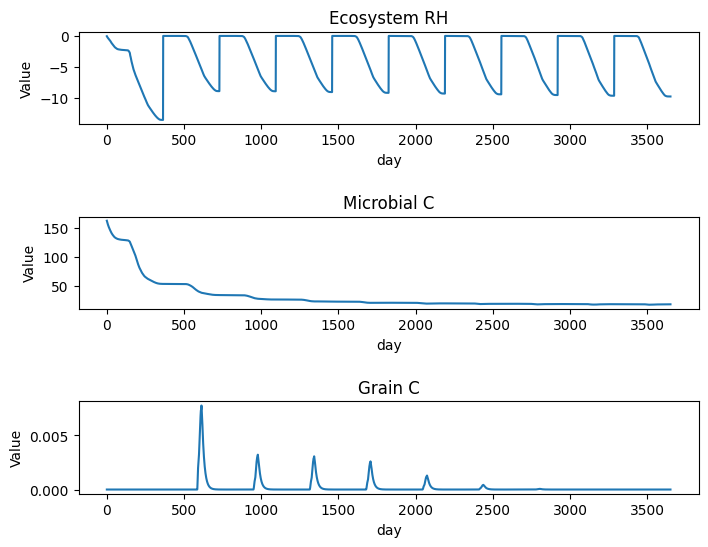

In [50]:
ECO_RH=nc_file.variables['ECO_RH'][:]
tMicbC=nc_file.variables['tMICRO_C'][:]
grainc=nc_file.variables['GRAIN_C'][:]

fig, axs = plt.subplots(3, 1, figsize=(8, 6),gridspec_kw={'hspace': 1.0})

axs[0].plot(ECO_RH)
axs[0].set_xlabel('day')
axs[0].set_ylabel('Value')
axs[0].set_title('Ecosystem RH')


axs[1].plot(tMicbC)
axs[1].set_xlabel('day')
axs[1].set_ylabel('Value')
axs[1].set_title('Microbial C')

axs[2].plot(grainc[:,0])
axs[2].set_xlabel('day')
axs[2].set_ylabel('Value')
axs[2].set_title('Grain C')


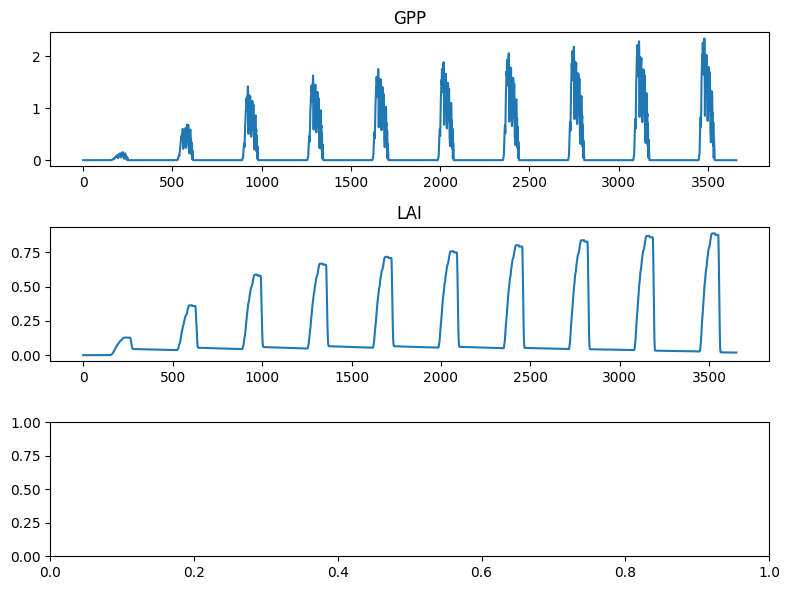

In [51]:
fig, axs = plt.subplots(3, 1, figsize=(8, 6))
axs[0].plot(tGPP)
axs[0].set_title('GPP')
axs[1].plot(eco_lai)
axs[1].set_title('LAI')
plt.tight_layout()

plt.show()